In [1]:
from nba_py.constants import CURRENT_SEASON
print(CURRENT_SEASON)

2016-17


In [2]:
%pylab inline 
#allows you to plot in jupyter notebook

Populating the interactive namespace from numpy and matplotlib


In [4]:
from nba_py import player
from nba_py import team
import matplotlib.pyplot as plt

In [5]:
plt.style.use('ggplot')

In [7]:
team.TeamList(league_id='00').info()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI
5,00,1610612742,1980,2017,DAL
6,00,1610612743,1976,2017,DEN
7,00,1610612744,1946,2017,GSW
8,00,1610612745,1967,2017,HOU
9,00,1610612746,1970,2017,LAC


In [9]:
season='2017-18'

In [10]:
TEAM_ID=1610612747

In [62]:
teamid_list=team.TeamList(league_id='00').info()[['TEAM_ID','ABBREVIATION']]

In [74]:
import os

## Pick Season

#### Name look up

plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/BOS
plots/CLE
plots/CLE


TypeError: Empty 'DataFrame': no numeric data to plot

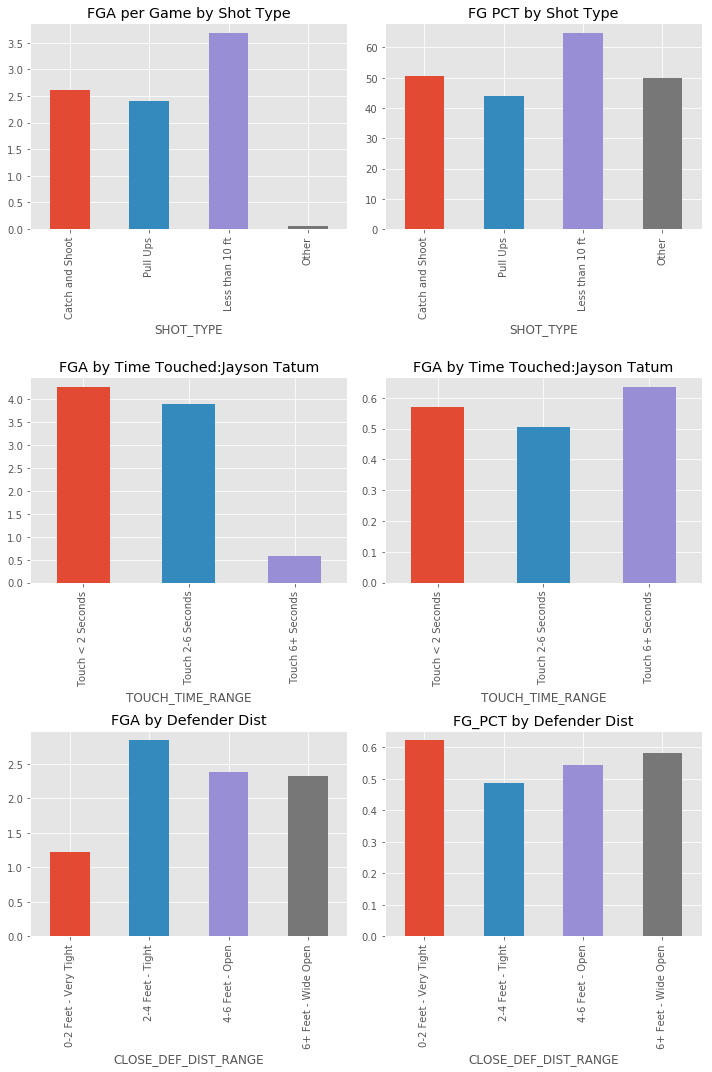

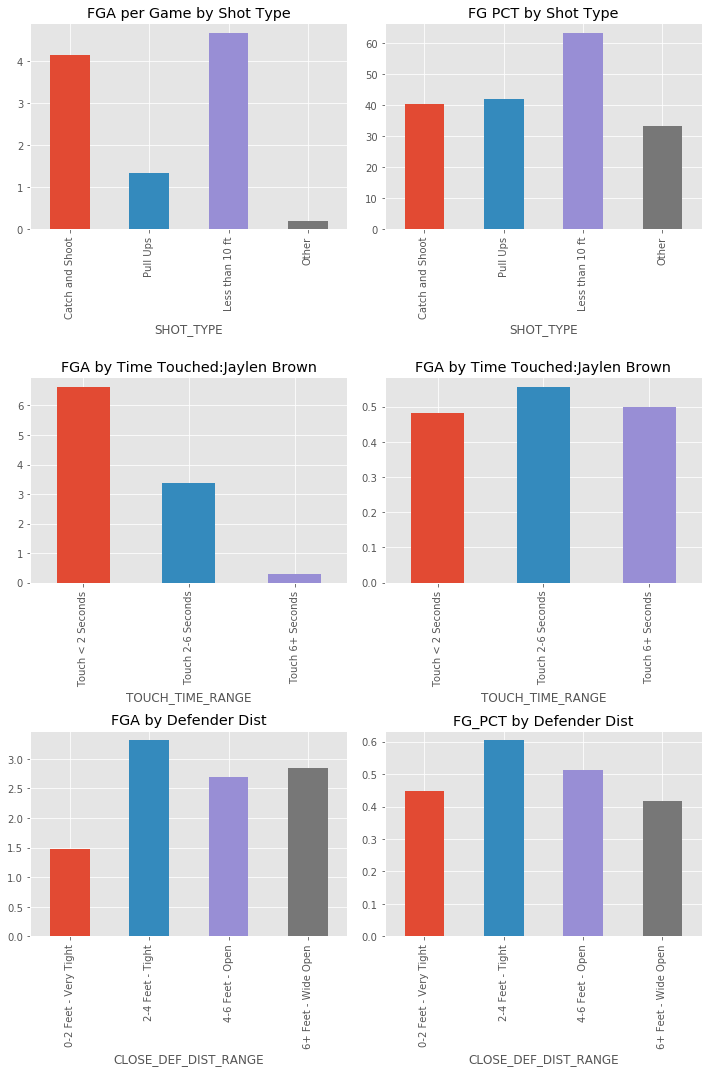

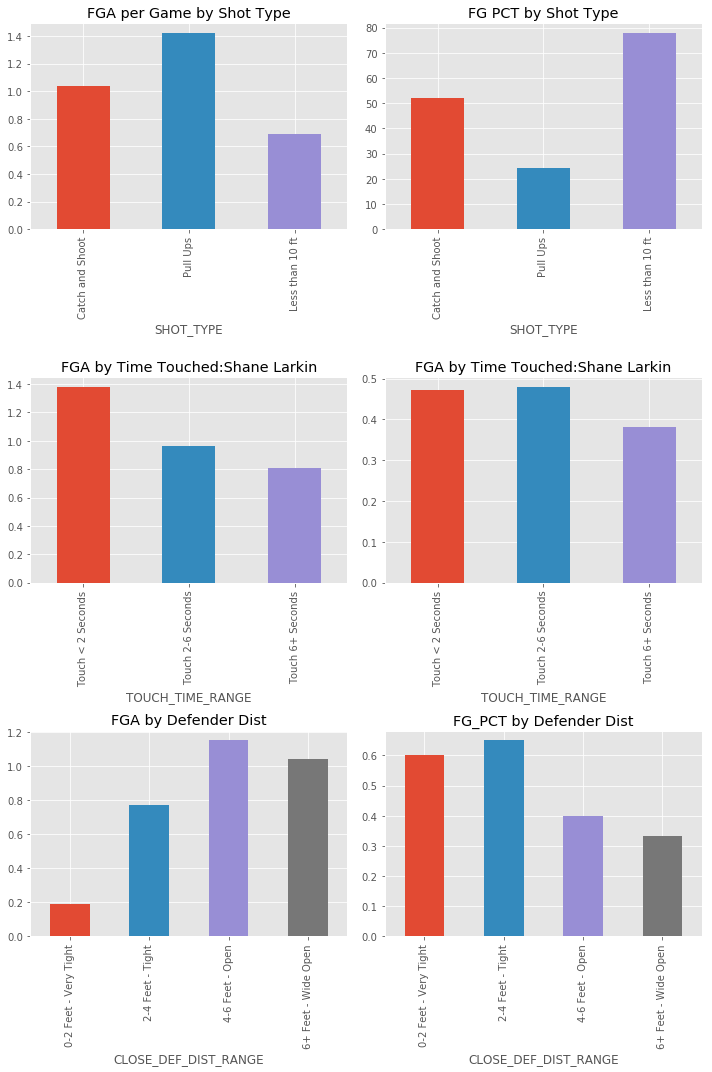

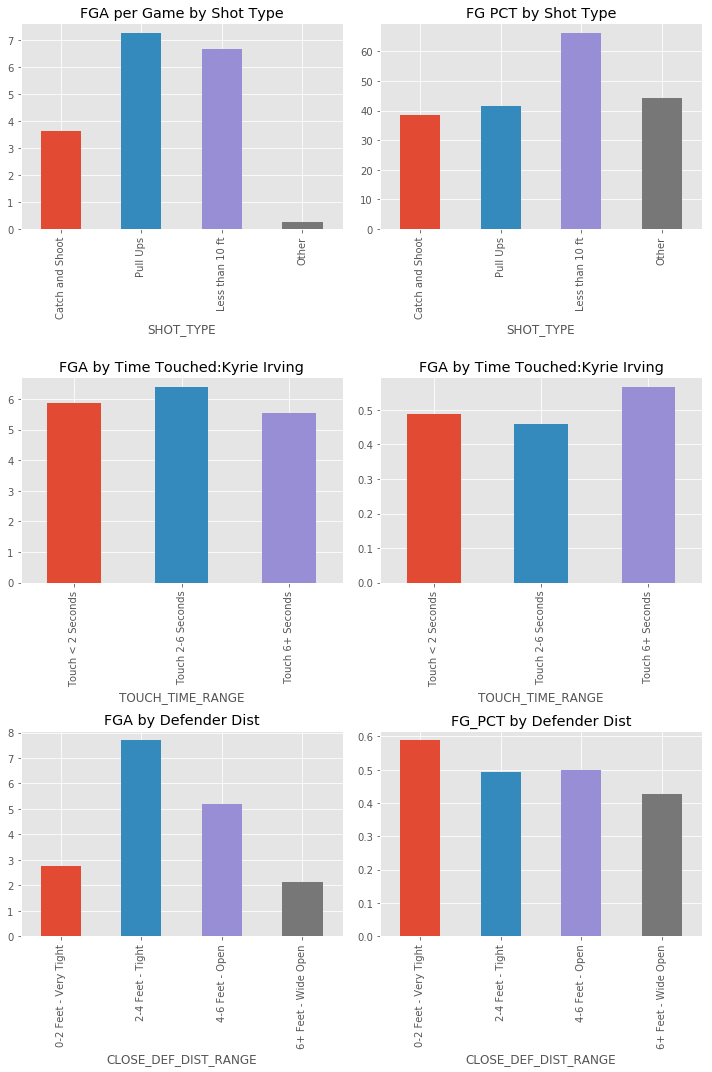

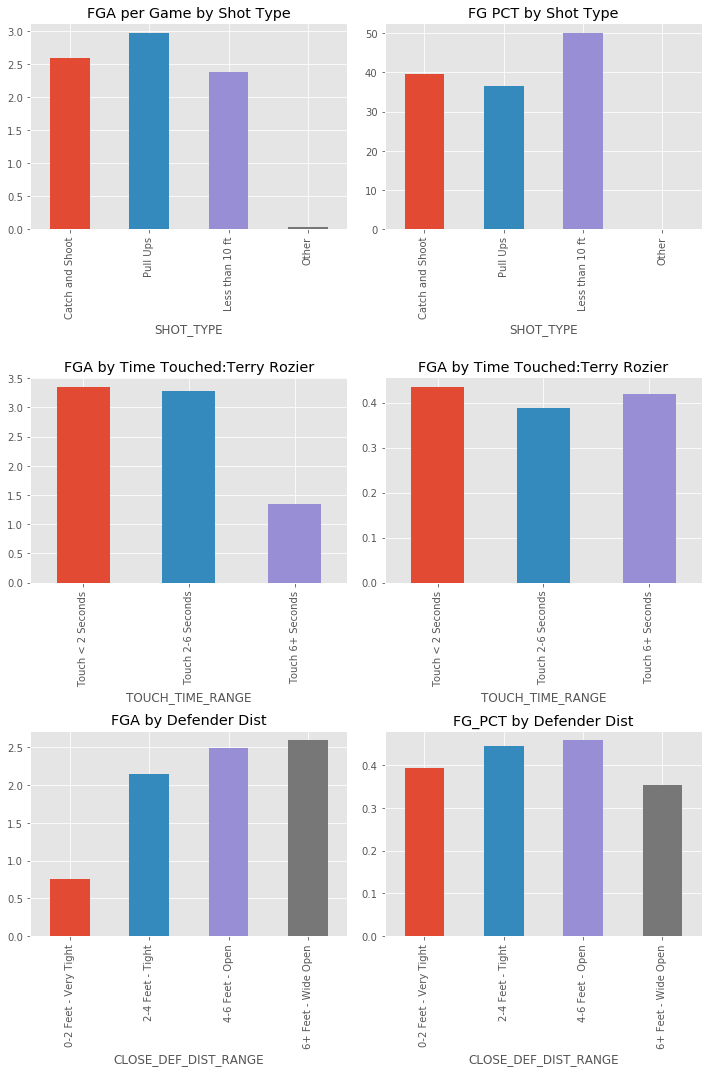

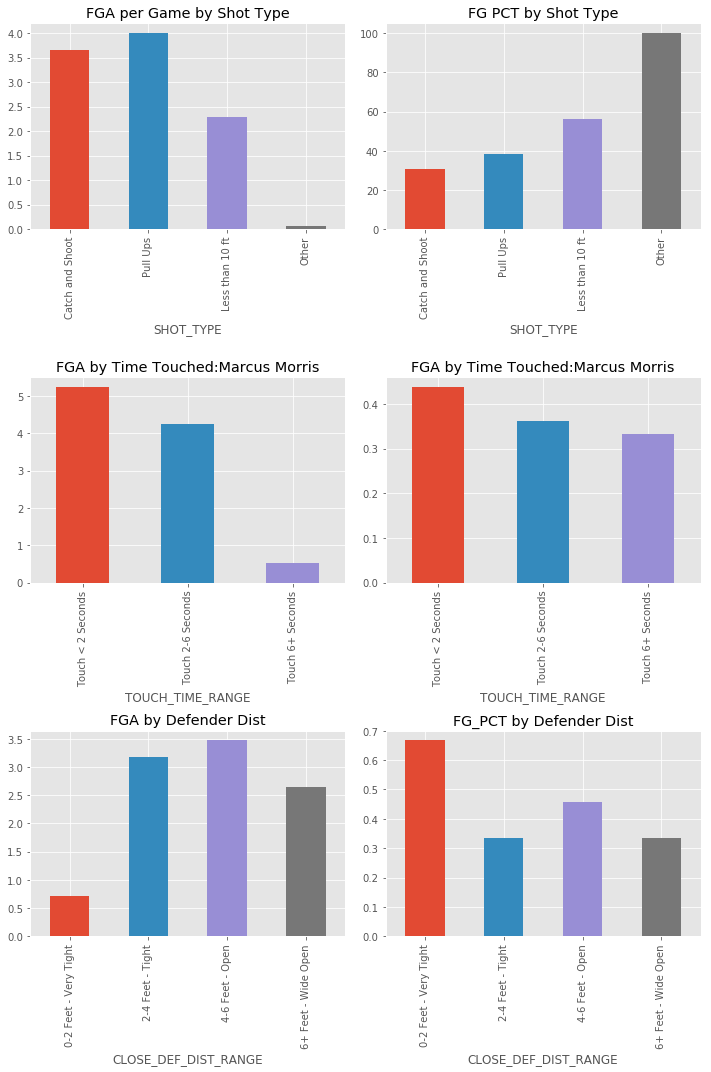

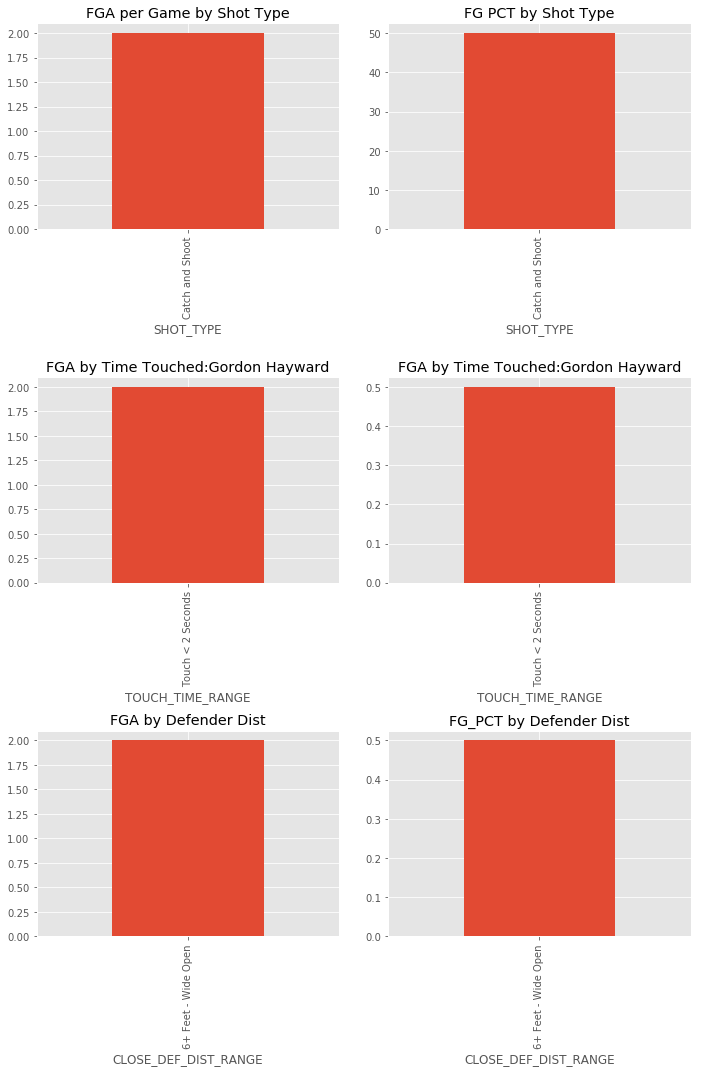

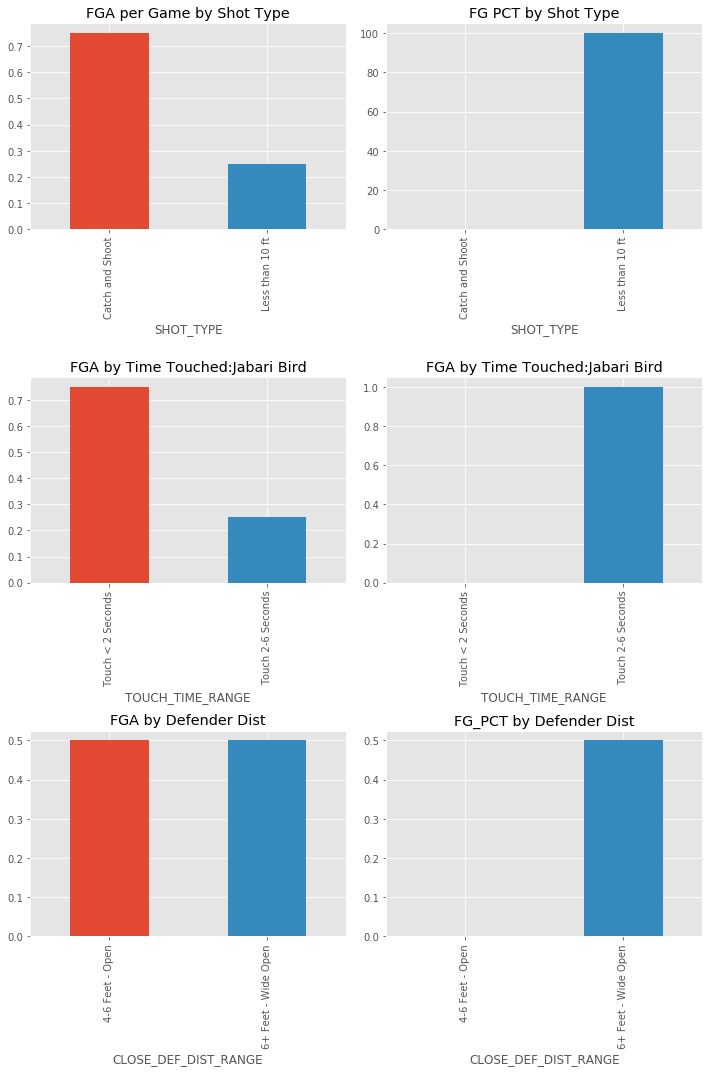

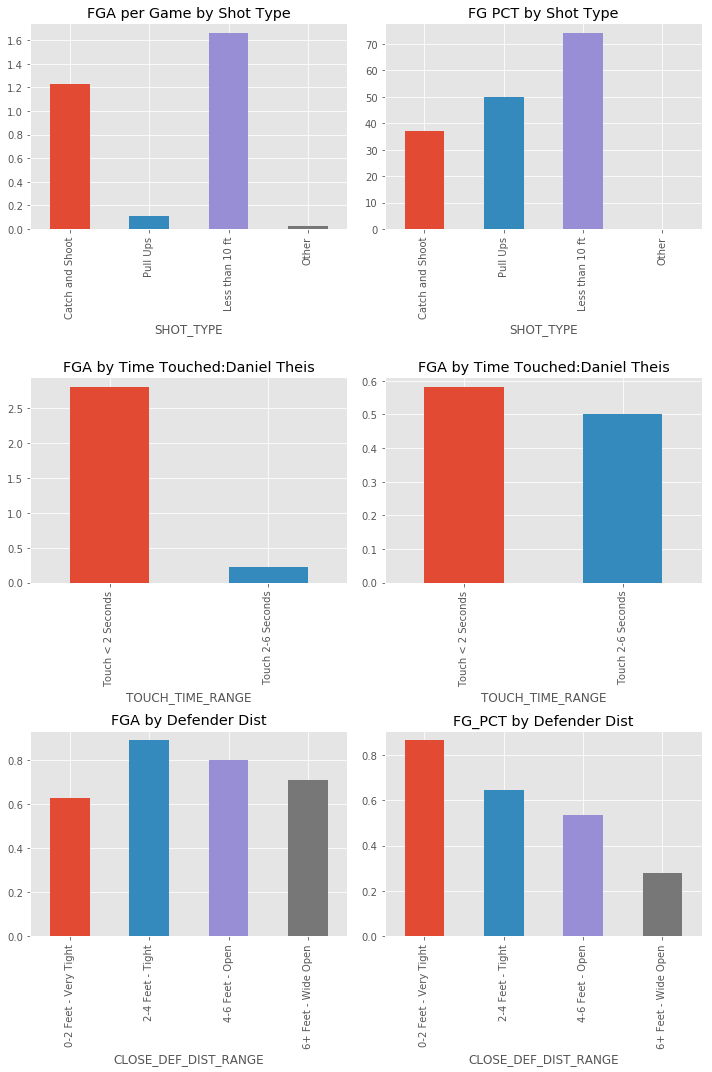

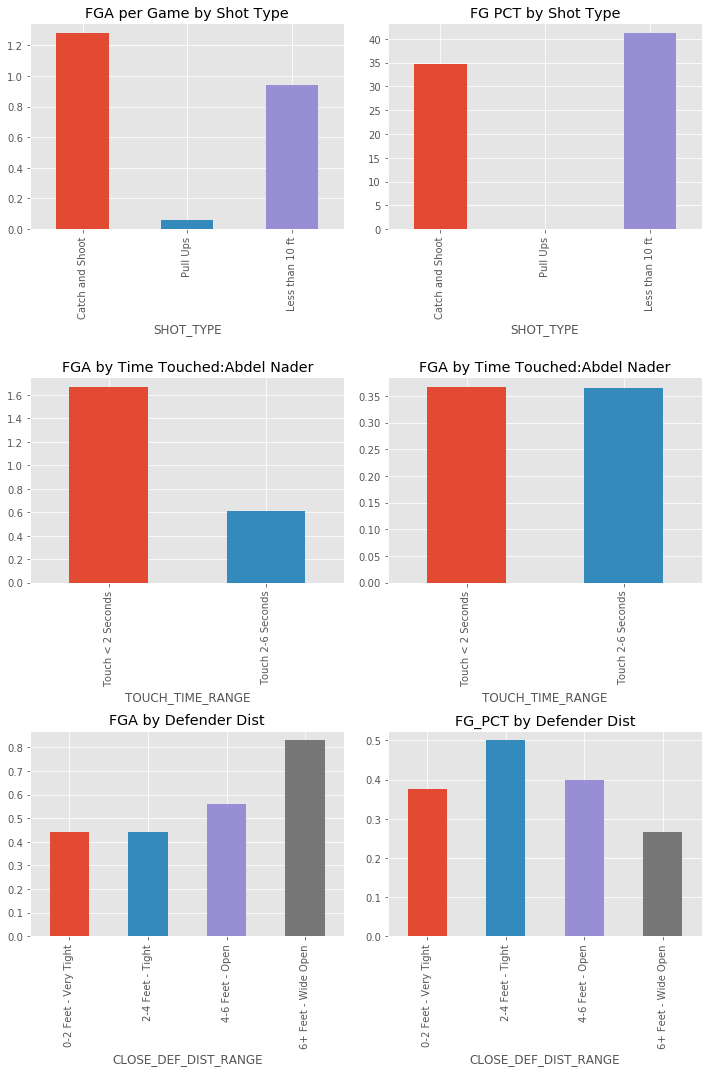

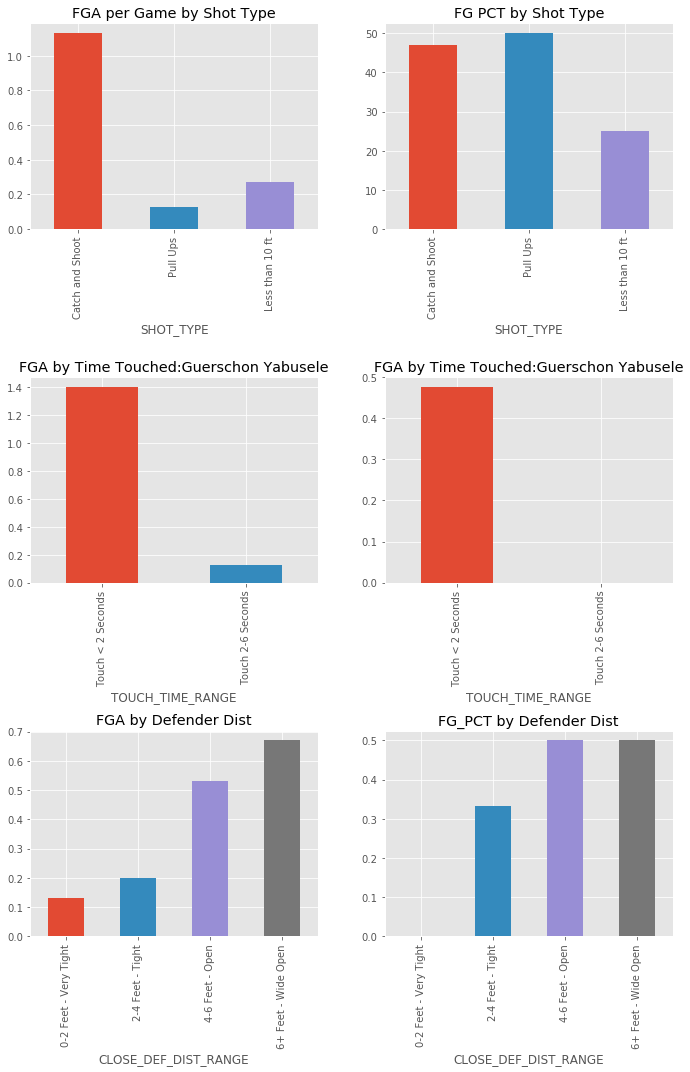

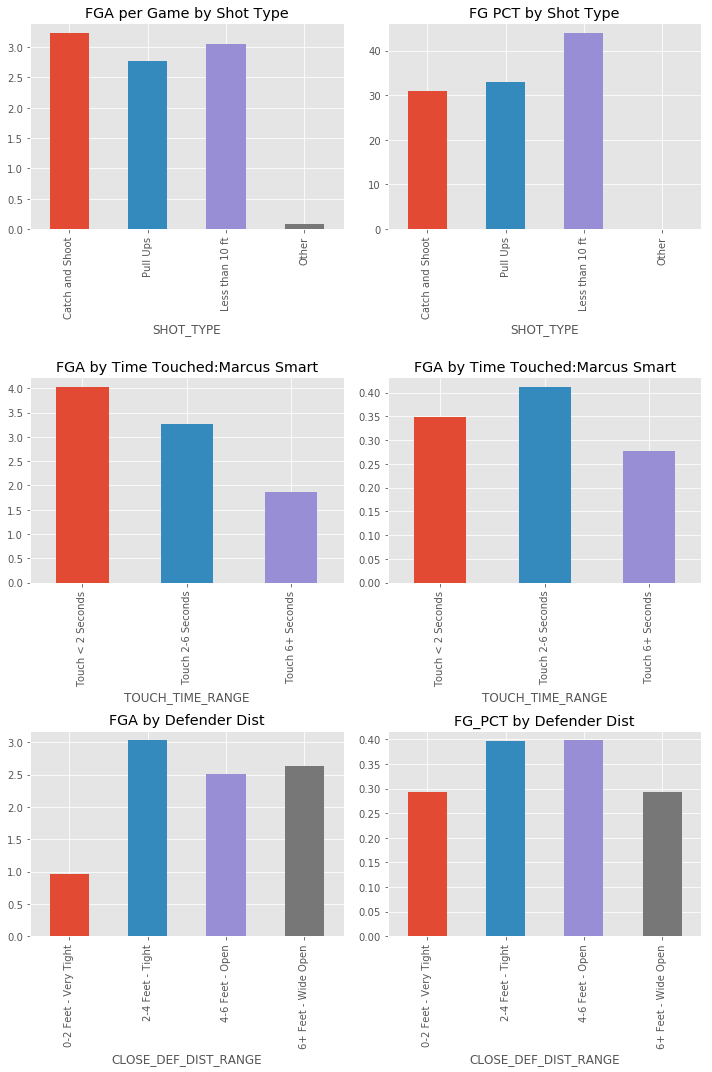

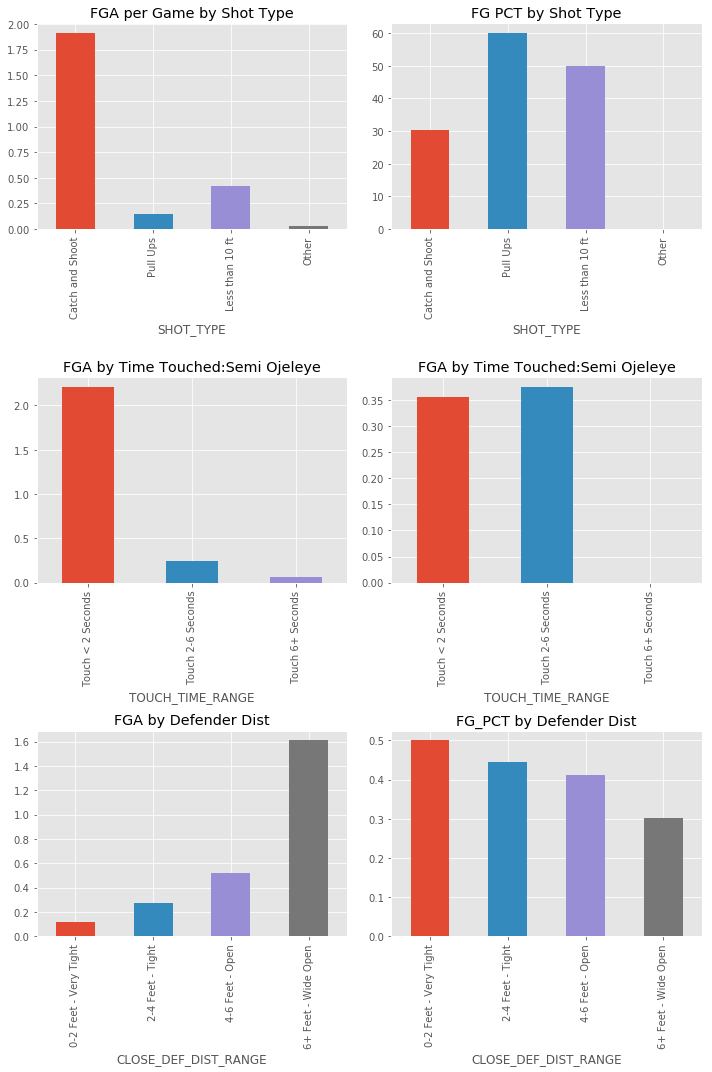

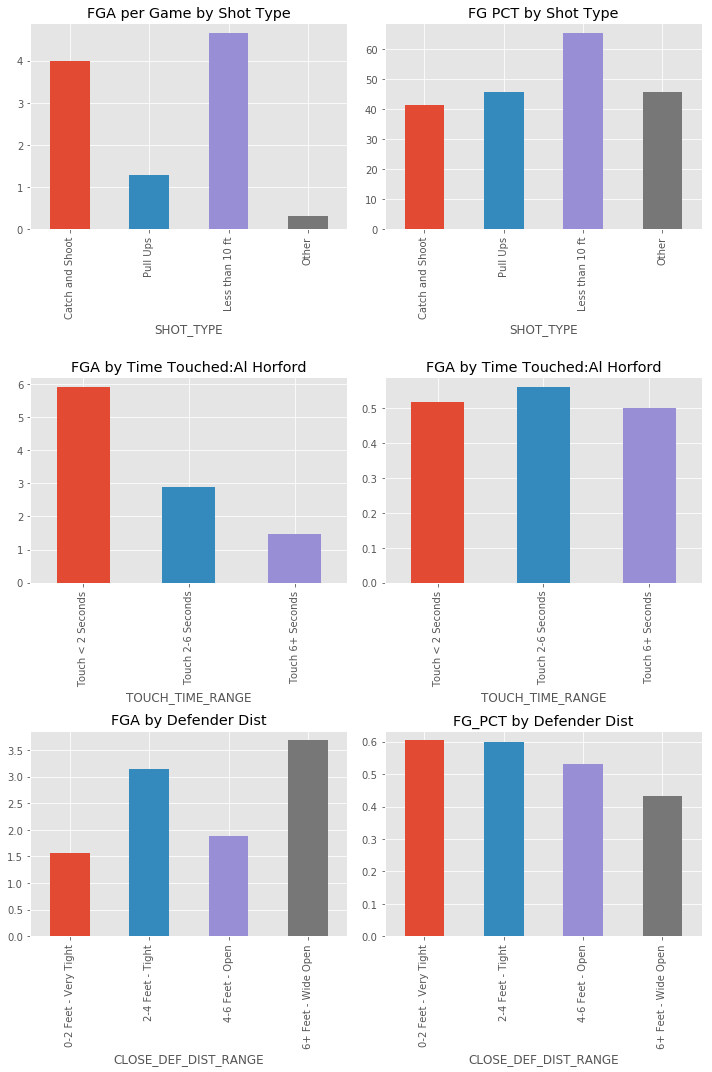

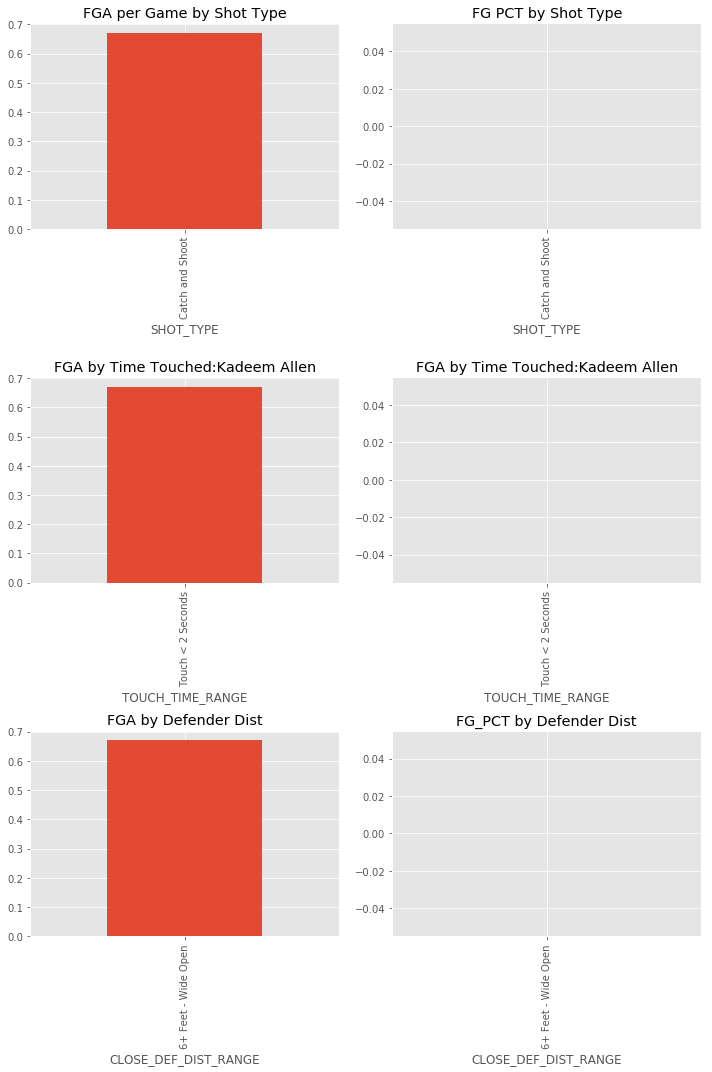

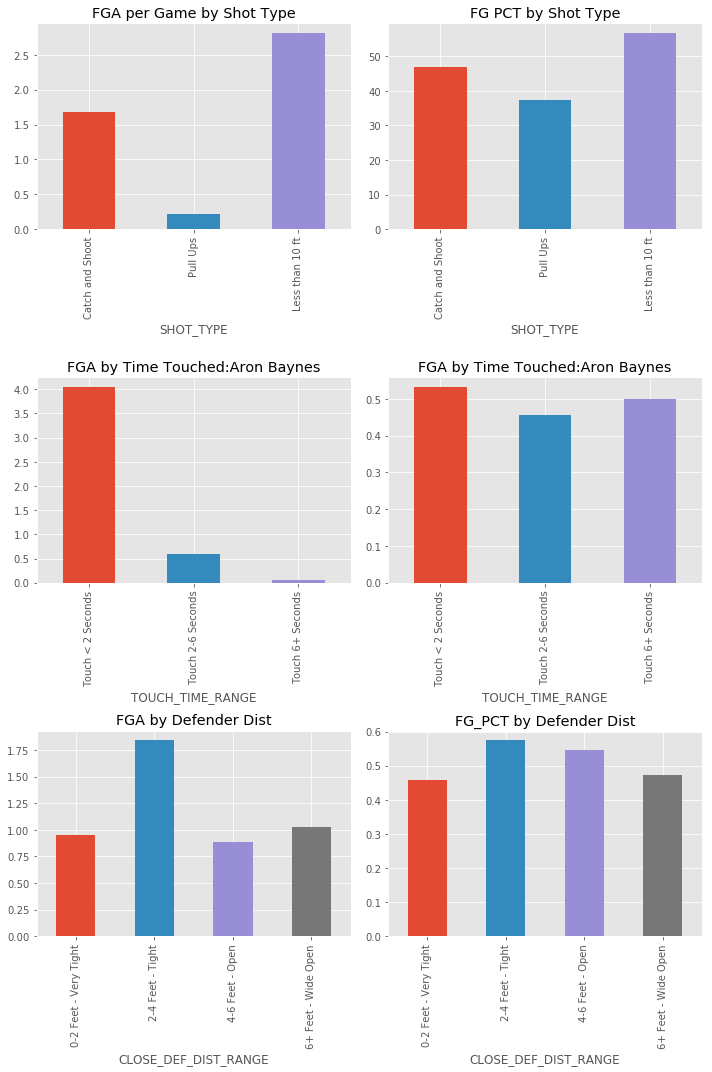

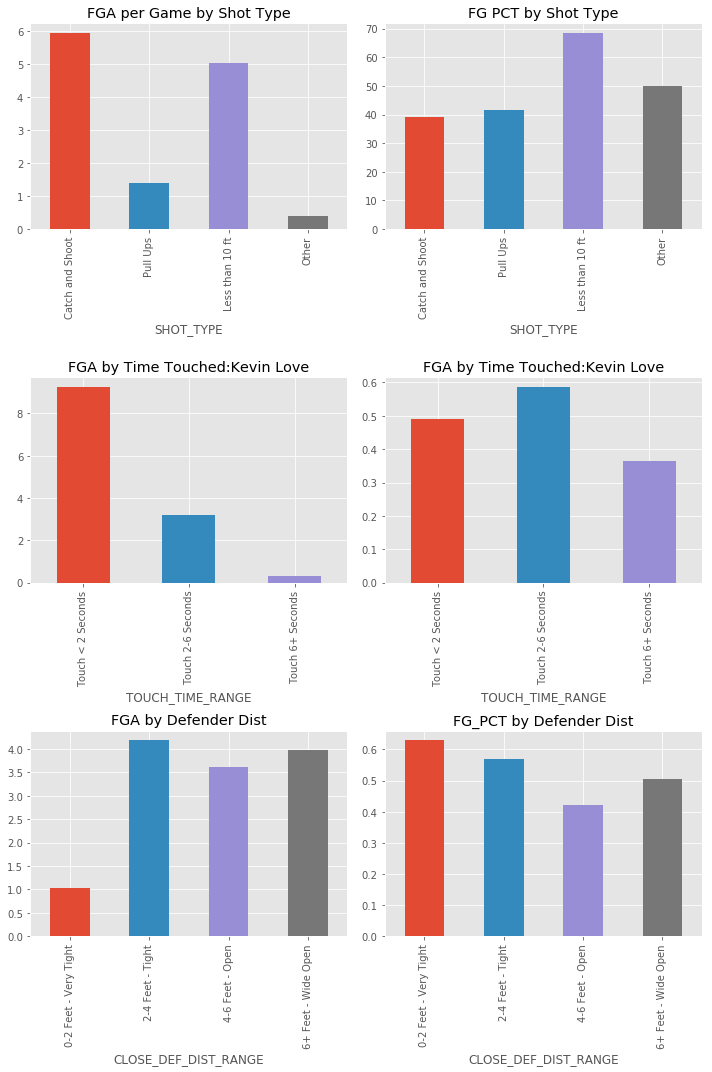

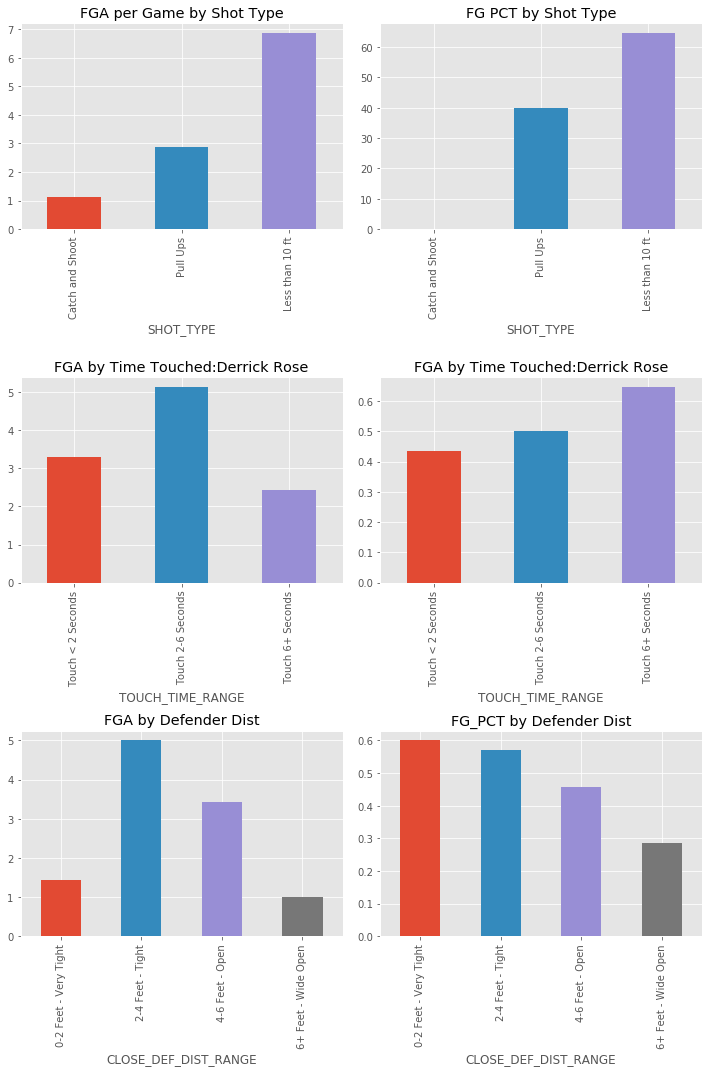

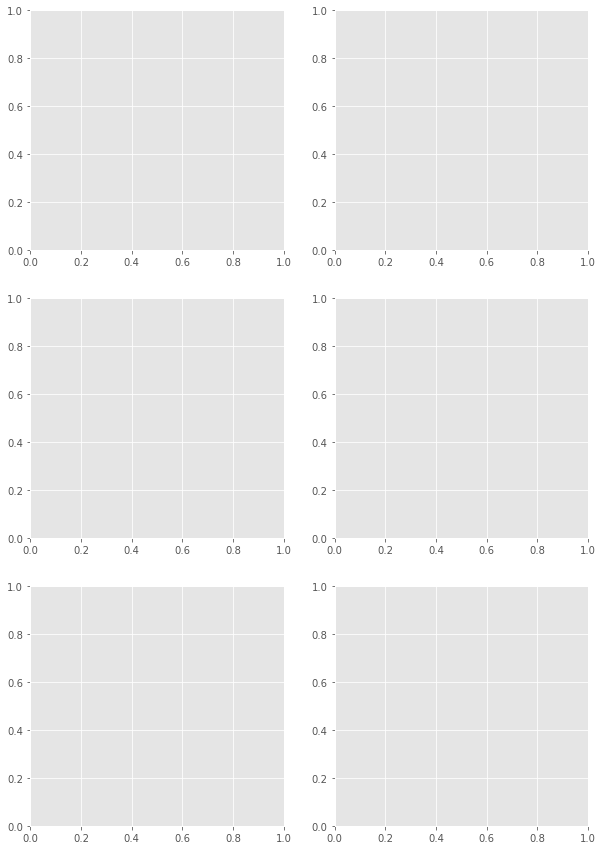

In [85]:
for i in range(1,len(teamid_list)):
    abb=teamid_list.iloc[i,1]
    teamid=teamid_list.iloc[i,0]
    playerid_list=team.TeamCommonRoster(teamid, season=season).roster()['PLAYER_ID']
    playerid=playerid_list[0]
    for x in playerid_list:
        playerid=x
        name=player.PlayerSummary(playerid).info()['DISPLAY_FIRST_LAST'][0]
        pst=player.PlayerShotTracking(playerid, 
                                  team_id=0, 
                                  measure_type='Base', 
                                  per_mode='PerGame', 
                                  plus_minus='N', 
                                  pace_adjust='N', 
                                  rank='N', 
                                  league_id='00', 
                                  season=season, season_type='Regular Season',
                                  po_round='0', outcome='', location='', 
                                  month='0', season_segment='', 
                                  date_from='', date_to='', 
                                  opponent_team_id='0', 
                                  vs_conference='', vs_division='', 
                                  game_segment='', period='0', 
                                  shot_clock_range='', last_n_games='0')
        ShotsByType=pst.general_shooting().set_index('SHOT_TYPE')
        ShotsByTime=pst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
        ShotsByDefense=pst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

        #plt.suptitle(name + ', ' + season)
        fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

        ShotsByType['FGA'].plot(kind='bar', title='FGA per Game by Shot Type', ax=ax1)
        (ShotsByType['FG_PCT']*100).plot(kind='bar', title='FG PCT by Shot Type', ax=ax2)
        ShotsByTime['FGA'].plot(kind='bar', title='FGA by Time Touched:' + name, ax=ax3 )
        ShotsByTime['FG_PCT'].plot(kind='bar', title='FGA by Time Touched:' + name, ax=ax4 )
        ShotsByDefense['FGA'].plot(kind='bar', title='FGA by Defender Dist', ax=ax5)
        ShotsByDefense['FG_PCT'].plot(kind='bar', title='FG_PCT by Defender Dist', ax=ax6)
        plt.tight_layout()
        newpath = 'plots/' + abb
        print(newpath)
        if not os.path.exists(newpath):
            os.makedirs(newpath)
        savefig(newpath + '/' + name+ '.jpeg')